# 드라이브 마운트

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 라이브러리 호출 및 데이터 로드

In [2]:
#라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras import layers 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Input, Dropout, BatchNormalization

In [3]:
%cd drive/MyDrive/은찬/

/content/drive/MyDrive/은찬


In [4]:
df = pd.read_csv('PPG_data (1).csv')

In [5]:
df = df.drop(['Unnamed: 11'], axis=1)
df

,HR,HRV,SDNN,RMSSD,PNN50,VLF,LF,HF,gender,age,blood_sugar
0,82,142,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
1,73,309,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
2,79,48,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
3,83,370,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
4,97,-1,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
...,...,...,...,...,...,...,...,...,...,...,...
5335,17,-3097,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5336,57,2427,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5337,78,993,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5338,91,1172,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125


# train-test split

In [6]:
blood_sugar_rate_lr = df
x_lr = blood_sugar_rate_lr[['HR', 'HRV', 'SDNN', 'RMSSD', 'PNN50', 'VLF', 'LF', 'HF', 'gender','age']]              # x축에 input 데이터 나열
y_lr = blood_sugar_rate_lr[['blood_sugar']]              # y축에 타겟 데이터 나열

x_train_lr, x_test_lr, y_train_lr, y_test_lr = \
  train_test_split(x_lr, y_lr, stratify=y_lr, test_size=0.2, random_state=42)      # 훈련 데이터와 테스트 데이터 분류

x_train_lr1, x_val_lr, y_train_lr1, y_val_lr = \
  train_test_split(x_train_lr, y_train_lr, stratify=y_train_lr, \
                   test_size=0.2, random_state=42)                     # 훈련 데이터와 검증 데이터 분류          
 
scaler_lr = StandardScaler()   # 객체 만들기
scaler_lr.fit(x_train_lr1)     # 변환 규칙을 익히기
x_train_scaled_lr = scaler_lr.transform(x_train_lr1)  # 데이터를 표준화 전처리
x_test_scaled_lr = scaler_lr.transform(x_test_lr)
x_val_scaled_lr = scaler_lr.transform(x_val_lr)      # 데이터를 표준화 전처리

# 모델 구축

In [ ]:
regularizer=tf.keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu', kernel_regularizer=regularizer))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# MAE, MSE, RMSE 

In [ ]:
y_pred_scale = m_best_11.predict(x_test_scaled_lr)

34/34 [==============================] - 0s 8ms/step


In [ ]:
mae = mean_absolute_error(y_test_lr, y_pred_scale)
mse = mean_squared_error(y_test_lr, y_pred_scale)
rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_scale))

print('MAE: {0:.2f}'.format(mae))
print('MSE: {0:.2f}'.format(mse))
print('RMSE: {0:.2f}'.format(rmse)) 

MAE: 4.02
MSE: 29.08
RMSE: 5.39


# 학습

## epoch : 100

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-model_regress_1210_3.h5',   #ModelCheckpoint의 객체 #'best-model.h5'이름으로 저장
                                                save_best_only=True) #모델이 "최상"으로 간주될 때만 저장
hist_1208_3 = model.fit(
    x_train_scaled_lr , y_train_lr1.values,
    batch_size=32,
    epochs=100,
    validation_data=(x_val_scaled_lr, y_val_lr.values),
    callbacks=[checkpoint_cb],
    verbose=1)

Epoch 1/100
107/107 [==============================] - 4s 37ms/step - loss: 141.0581 - mae: 8.3851 - val_loss: 460.5086 - val_mae: 6.7074
Epoch 2/100
107/107 [==============================] - 4s 42ms/step - loss: 130.6326 - mae: 8.0667 - val_loss: 448.1657 - val_mae: 6.4238
Epoch 3/100
107/107 [==============================] - 5s 48ms/step - loss: 131.0506 - mae: 7.9429 - val_loss: 451.2507 - val_mae: 6.5018
Epoch 4/100
107/107 [==============================] - 5s 46ms/step - loss: 126.1048 - mae: 7.9759 - val_loss: 468.3661 - val_mae: 6.4975
Epoch 5/100
107/107 [==============================] - 4s 40ms/step - loss: 153.9005 - mae: 8.2983 - val_loss: 469.0474 - val_mae: 7.0098
Epoch 6/100
107/107 [==============================] - 6s 60ms/step - loss: 148.1517 - mae: 8.5997 - val_loss: 468.7733 - val_mae: 7.2744
Epoch 7/100
107/107 [==============================] - 5s 48ms/step - loss: 142.1049 - mae: 8.2064 - val_loss: 472.5044 - val_mae: 7.3394
Epoch 8/100
107/107 [=============

In [ ]:
m_best_11 = keras.models.load_model("best-model_regress_1210_3.h5")

In [ ]:
r2 = r2_score(y_test_lr.values, m_best_11.predict(x_test_scaled_lr))
print(r2)

34/34 [==============================] - 1s 8ms/step
0.6463230069321357


## eposh : 1000

In [ ]:
#best model 저장
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-model_regress_1208_8.h5',   #ModelCheckpoint의 객체 #'best-model.h5'이름으로 저장
                                                save_best_only=True) #모델이 "최상"으로 간주될 때만 저장
hist_1208_3 = model.fit(
    x_train_scaled_lr , y_train_lr1.values,
    batch_size=32,
    epochs=1000,
    validation_data=(x_val_scaled_lr, y_val_lr.values),
    callbacks=[checkpoint_cb],
    verbose=1)

Epoch 1/1000
107/107 [==============================] - 15s 49ms/step - loss: 15027.7148 - mae: 118.9663 - val_loss: 14995.7852 - val_mae: 118.9007
Epoch 2/1000
107/107 [==============================] - 5s 45ms/step - loss: 14543.6680 - mae: 117.0547 - val_loss: 16420.2520 - val_mae: 125.6417
Epoch 3/1000
107/107 [==============================] - 6s 56ms/step - loss: 13632.7021 - mae: 113.4104 - val_loss: 15249.7969 - val_mae: 121.5040
Epoch 4/1000
107/107 [==============================] - 5s 50ms/step - loss: 12356.3584 - mae: 107.9803 - val_loss: 11759.0615 - val_mae: 106.6922
Epoch 5/1000
107/107 [==============================] - 4s 37ms/step - loss: 10861.7070 - mae: 101.0173 - val_loss: 10201.9570 - val_mae: 96.7790
Epoch 6/1000
107/107 [==============================] - 4s 36ms/step - loss: 9233.3008 - mae: 92.7396 - val_loss: 7705.4297 - val_mae: 84.9490
Epoch 7/1000
107/107 [==============================] - 4s 36ms/step - loss: 7546.0151 - mae: 83.4691 - val_loss: 6782.861

## R^2 score

In [ ]:
m_best_11 = keras.models.load_model('best-model_regress_1208_8.h5')

In [ ]:
r2 = r2_score(y_test_lr.values, m_best_11.predict(x_test_scaled_lr))
print(r2)

34/34 [==============================] - 2s 19ms/step
0.9695398824387353


## MAE, MSE, RMSE

In [ ]:
y_pred = m_best_11.predict(x_test_scaled_lr)

34/34 [==============================] - 0s 12ms/step


In [ ]:
mae = mean_absolute_error(y_test_lr.values, y_pred)
mse = mean_squared_error(y_test_lr.values, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_lr.values, y_pred))

print('MAE: {0:.2f}'.format(mae))
print('MSE: {0:.2f}'.format(mse))
print('RMSE: {0:.2f}'.format(rmse)) 

MAE: 3.60
MSE: 26.59
RMSE: 5.16


## loss plot

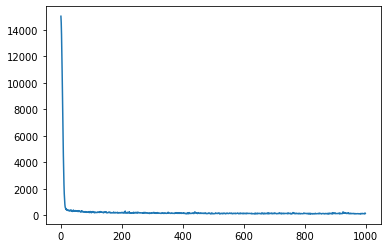

In [ ]:
plt.plot(hist_1208_3.history['loss'])

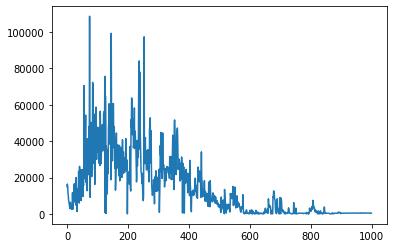

In [ ]:
plt.plot(hist_1208_3.history['val_loss'])